In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.pyplot as plt
from Haldane_anis_supervise_class import *
from partial import *

In [ ]:
L = 10  # number of particles must be odd
keep = [1,2,3] # keep the part that we wanna do partial trace over that
bond = 10  # reasonable amount
p = partial(L, keep, bond)

In [3]:
train_set = p.generate_dataset()

Starting dataset generation — this step includes both the training and test sets. Please be patient...


Generating train set: 100%|██████████| 187/187 [00:16<00:00, 11.65it/s]

Train_set is generated in 16.11 seconds.


In [4]:
MPS_train = train_set[0]
d = len(MPS_train)  # dimension of the local Hilbert space
lst=[]
for i in range(d):
    a = MPS_train[i].partial_trace_to_dense_canonical(where=keep)
    lst.append(a)
MPS_train = lst

gram_train = np.zeros((d, d))

for idx in tqdm(range(d * d), desc='Gram Partial Train'):
    i = idx // d
    j = idx % d
    if j >= i:
        gram_train[i, j] = gram_train[j, i] = (np.trace(MPS_train[i] @ MPS_train[j]).real)**2

Gram Partial Train: 100%|██████████| 34969/34969 [00:00<00:00, 70949.28it/s]


In [5]:
L = len(keep) #number of particles must be odd

In [6]:
testset = Haldan_anis(L = L, bond = bond).generate_test_set()


Generating test set: 100%|██████████| 1600/1600 [00:15<00:00, 100.94it/s]


In [7]:

d = len(testset)  # dimension of the local Hilbert space
lst=[]
for i in range(d):
    a = testset[i].partial_trace_to_dense_canonical(where=[0,1,2])
    lst.append(a)
partial_trace_test = lst

In [8]:
d1 = len(partial_trace_test)
d2 = len(MPS_train)
gram_matrix_test = np.zeros((d1,d2))
for i in tqdm(range(d1), desc='Gram Partial Test'):
    for j in range(d2):
        gram_matrix_test[i,j] = (np.trace(partial_trace_test[i] @ MPS_train[j]).real)**2

Gram Partial Test: 100%|██████████| 1600/1600 [00:07<00:00, 213.32it/s]


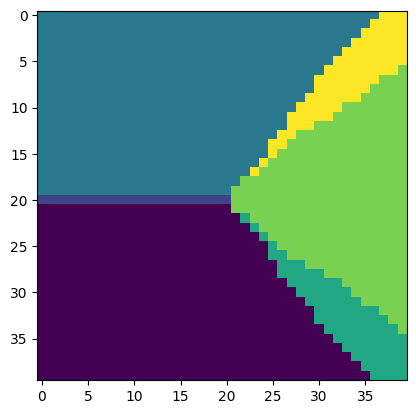

In [9]:
clf = svm.SVC(kernel='precomputed')
kernel_train = gram_train
kernel_test = gram_matrix_test
y = train_set[1]
clf.fit(kernel_train**0.1, y) 
y_pred = clf.predict(kernel_test)
plt.imshow(y_pred.reshape(40,40))
plt.savefig(f'result for DMRG states with L={L} and bond dimension ={bond}.png')
plt.show()